<center> <h1> G2M insight for Cab Investment firm </h1></center>

### Objective:

Analyse the G2M cab datasets consisting of data of two cab companies (Pink and Yellow) and make recommendations for a cab investment firm to invest their capital.

### Assumptions:

1. Profit Magin = (Price Charged - Cost of Trip )/ Price Charged
2. Joins made to merge tables were inner and left joins accordingly.

In [ ]:
import pandas as pd
import numpy as np

In [2]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [3]:
cabdata=pd.read_csv(r'C:\Users\Ashish\Downloads\DataSets-main\DataSets-main\Cab_Data.csv')
city=pd.read_csv(r'C:\Users\Ashish\Downloads\DataSets-main\DataSets-main\City.csv')
customer=pd.read_csv(r'C:\Users\Ashish\Downloads\DataSets-main\DataSets-main\Customer_ID.csv')
transaction=pd.read_csv(r'C:\Users\Ashish\Downloads\DataSets-main\DataSets-main\Transaction_ID.csv')

In [5]:
cabdata['Date of Travel'] = pd.to_datetime(cabdata['Date of Travel'])

# 1. Which Cab company had higher number of rides ?

In [6]:
total_rides = pd.DataFrame(cabdata.groupby('Company')['Transaction ID'].count())
total_rides = total_rides.rename(columns={'Transaction ID':'Total Rides'})
total_rides

,Total Rides
Company,
Pink Cab,84711
Yellow Cab,274681


#### From the above table it is quite evident that Yellow Company had far more cab rides than pink company on the basis of transactions made. 

# 2. Which company made higher profits ?


In [7]:
profit =pd.DataFrame(cabdata.groupby('Company')['Price Charged','Cost of Trip'].sum())
profit['Profit']=profit['Price Charged']-profit['Cost of Trip']

C:\Users\Ashish\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [8]:
profit["Profit Margin (%)"] = (profit["Profit"]*100) / profit['Price Charged']
profit

,Price Charged,Cost of Trip,Profit,Profit Margin (%)
Company,,,,
Pink Cab,26328251.33,21020923.01,5307328.32,20.16
Yellow Cab,125853887.19,81833514.02,44020373.17,34.98


#### So, from above table we can conclude that yellow cab has relatively high profit margin than Pink Company, which can also be directly related to the high number of rides in Yellow Cab.

# 3. Analyzing annual profit per company

In [9]:
yearly_profit = cabdata.groupby([cabdata['Date of Travel'].dt.strftime('%Y'), 'Company'])['Price Charged','Cost of Trip'].sum()
yearly_profit

C:\Users\Ashish\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Price Charged  Cost of Trip
Date of Travel Company                                
2016           Pink Cab       7908479.23    6194968.01
               Yellow Cab    38481133.18   24554137.75
2017           Pink Cab       9578629.54    7544974.63
               Yellow Cab    45818910.04   29242932.07
2018           Pink Cab       8841142.56    7280980.37
               Yellow Cab    41553843.97   28036444.20

In [10]:
yearly_profit['Profit']= yearly_profit['Price Charged']-yearly_profit['Cost of Trip']
yearly_profit["Profit Margin (%)"] = (yearly_profit["Profit"]*100) / yearly_profit['Price Charged']
yearly_profit

Price Charged  Cost of Trip      Profit  \
Date of Travel Company                                               
2016           Pink Cab       7908479.23    6194968.01  1713511.22   
               Yellow Cab    38481133.18   24554137.75 13926995.43   
2017           Pink Cab       9578629.54    7544974.63  2033654.91   
               Yellow Cab    45818910.04   29242932.07 16575977.97   
2018           Pink Cab       8841142.56    7280980.37  1560162.19   
               Yellow Cab    41553843.97   28036444.20 13517399.77   

                           Profit Margin (%)  
Date of Travel Company                        
2016           Pink Cab                21.67  
               Yellow Cab              36.19  
2017           Pink Cab                21.23  
               Yellow Cab              36.18  
2018           Pink Cab                17.65  
               Yellow Cab              32.53

#### From the table we can observe a decrease in profit margin of both company especially from 2017 to 2018.
#### Although the Price Charged increased from 2016 to 2017, gaining more revenue. It was proportional to the increase in Cost of Trip. And from 2017 -2018 a slight decrease in Price Charged can also be observed.

#### However, comparing the profits of both company, Yellow performed significantly better.

# 4. Is there seasonality present in the usage of ride leading to more profits in certain months of the year ?

In [77]:
monthly_profit = cabdata.groupby([cabdata['Date of Travel'].dt.strftime('%Y/%m'), 'Company'])['Price Charged','Cost of Trip'].sum()
monthly_profit['Profit']= monthly_profit['Price Charged']-monthly_profit['Cost of Trip']
monthly_profit["Profit Margin (%)"] = (monthly_profit["Profit"]*100) / monthly_profit['Price Charged']
monthly_profit

,index,Date of Travel,Company,Price Charged,Cost of Trip,Profit,Profit Margin (%)
0,0,2016/01,Pink Cab,305236.77,231283.91,73952.86,24.23
1,1,2016/01,Yellow Cab,1952149.76,1115841.65,836308.11,42.84
2,2,2016/02,Pink Cab,344521.86,257046.32,87475.54,25.39
3,3,2016/02,Yellow Cab,2398229.53,1389060.36,1009169.17,42.08
4,4,2016/03,Pink Cab,394890.37,307089.19,87801.18,22.23
...,...,...,...,...,...,...,...
67,67,2018/10,Yellow Cab,4166490.17,2892733.92,1273756.25,30.57
68,68,2018/11,Pink Cab,1212611.50,973273.77,239337.73,19.74
69,69,2018/11,Yellow Cab,4755546.08,3338612.75,1416933.33,29.80
70,70,2018/12,Pink Cab,1223418.98,937813.05,285605.93,23.34


#### Above table indicates monthly profits achieved in each month of years (2016, 2017, 2018)

In [ ]:
monthly_profit.reset_index(inplace= True)

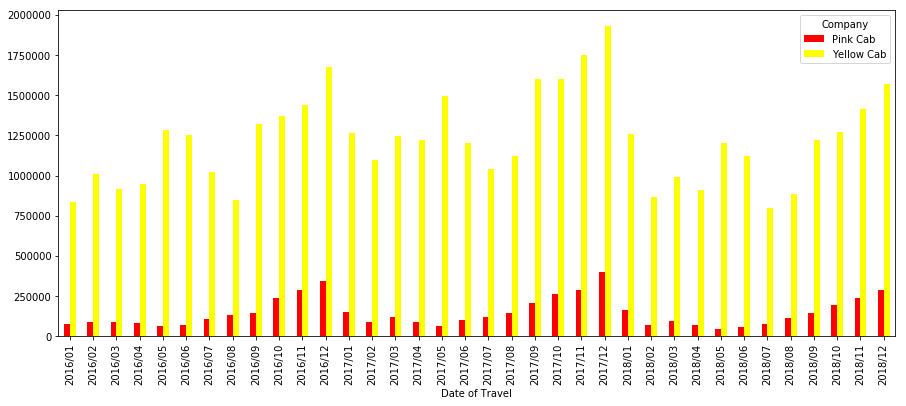

In [78]:
df = monthly_profit.pivot(index='Date of Travel', columns='Company', values='Profit')
df.plot(kind = 'bar', color = ['red', 'yellow'], figsize = [15, 6] )

####  From the above plot a trend can be oberved in the monthly profit. Profit line tends to increase during the months of September to December in a year, and gaining highest profit in December. 

#### And Yellow cab gained significantly more profit in each month of the data provided.


# 5. Is there any effect of customer rider-ship ?

In [15]:
print(customer['Customer ID'].nunique(), transaction['Customer ID'].nunique())

49171 49171


#### Following numbers indicate that each and every customer registered has utilised the cabs atleast 1 time.

In [16]:
cab_transaction = pd.merge(cabdata[['Transaction ID','Date of Travel','Company','City','KM Travelled','Price Charged','Cost of Trip']],transaction,on='Transaction ID')

In [17]:
user_per_company = pd.DataFrame(cab_transaction.groupby(['Company'])['Customer ID'].nunique())

#### It indicate that 32330 users utilised Pink Company cab and 39386 users travelled using Yellow Company Cab.
#### Thus, more number of people uses Yellow Company cab which leads to higher profits.

In [19]:
user_per_year = pd.DataFrame(cab_transaction.groupby([cab_transaction['Date of Travel'].dt.strftime('%Y'), 'Company'])['Customer ID'].nunique())
print(user_per_year)

                           Customer ID
Date of Travel Company                
2016           Pink Cab          16661
               Yellow Cab        25937
2017           Pink Cab          18643
               Yellow Cab        27789
2018           Pink Cab          18400
               Yellow Cab        27470


#### We can observe a increase a of users in both cab company from 2016-2017. However, a slight decline was observed from 2017-2018, which can be seen in the below graph.

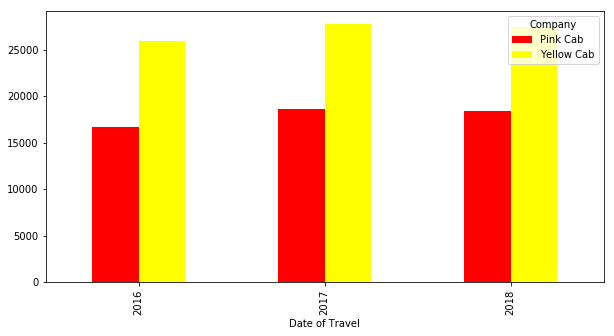

In [38]:
user_per_year.reset_index(inplace= True)
user_per_year=user_per_year.rename(columns={'Customer ID':'Total Users'})
df1 = user_per_year.pivot(index='Date of Travel', columns='Company', values='Total Users')
df1.plot.bar(color= ['red', 'yellow'], figsize = [10, 5] )

In [85]:
#cost_per_year = pd.DataFrame(cab_transaction.groupby([cab_transaction['Date of Travel'].dt.strftime('%Y'), 'Company'])['Cost of Trip'].sum())
#cost_per_year
Average_cost_per_year = cost_per_year.merge(user_per_year, left_index=True, right_index=True)

In [87]:
Average_cost_per_year['Average Trip Cost'] = Average_cost_per_year['Cost of Trip'] / Average_cost_per_year['Customer ID']
Average_cost_per_year

Cost of Trip  Customer ID  Average Trip Cost
Date of Travel Company                                                 
2016           Pink Cab      6194968.01        16661             371.82
               Yellow Cab   24554137.75        25937             946.68
2017           Pink Cab      7544974.63        18643             404.71
               Yellow Cab   29242932.07        27789            1052.32
2018           Pink Cab      7280980.37        18400             395.71
               Yellow Cab   28036444.20        27470            1020.62

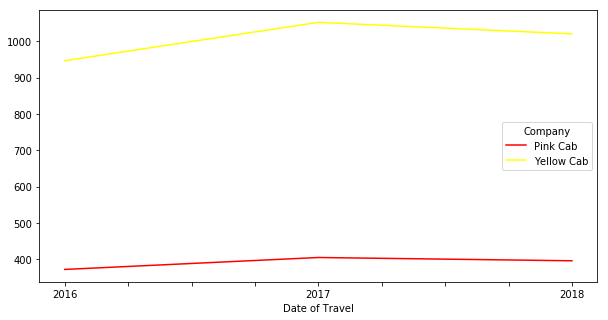

In [89]:
Average_cost_per_year.reset_index(inplace= True)
df3 = Average_cost_per_year.pivot(index='Date of Travel', columns='Company', values='Average Trip Cost')
df3.plot.line(color= ['red', 'yellow'], figsize = [10, 5] )

#### From this plot it is evident that decrease in cab users 2017-2018 is not due to increase in cost of trip. As cost of trip is also decreasing from 2017-2018.

# Does geographic location and population size increases cab ridership?

In [64]:
city_cabdata=pd.merge(cabdata[['Transaction ID','Company','City','Price Charged','Cost of Trip']],city,how = 'left', on='City')

In [65]:
city_cabdata.isnull().sum()

Transaction ID    0
Company           0
City              0
Price Charged     0
Cost of Trip      0
Population        0
Users             0
Non_Users         0
dtype: int64

In [48]:
city['Population'] = city['Population'].str.replace(',', '').astype('int64')
city['Users'] = city['Users'].str.replace(',', '').astype('int64')

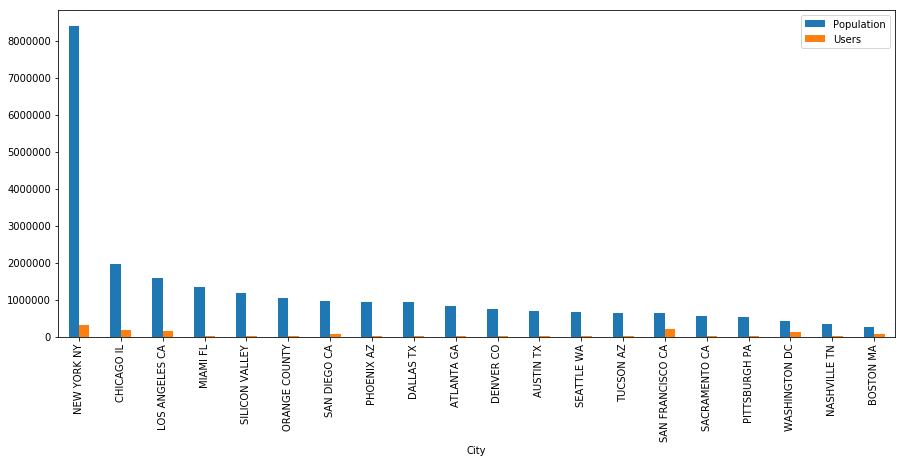

In [91]:
city.plot(kind='bar',x='City',y=['Population', 'Users'], figsize = [15, 6] )

#### Above plot indicates City population against cab users in a city.
#### It cab be seen that although New York have the highest population, the number of people using the cab is comparatively low if compared the difference.
#### This indicates population size have very low effect in cab rides.

In [93]:
citypop = pd.DataFrame(city_cabdata.groupby(['City', 'Company'])['Transaction ID'].count())
citypop

Transaction ID
City           Company                   
ATLANTA GA     Pink Cab              1762
               Yellow Cab            5795
AUSTIN TX      Pink Cab              1868
               Yellow Cab            3028
BOSTON MA      Pink Cab              5186
               Yellow Cab           24506
CHICAGO IL     Pink Cab              9361
               Yellow Cab           47264
DALLAS TX      Pink Cab              1380
               Yellow Cab            5637
DENVER CO      Pink Cab              1394
               Yellow Cab            2431
LOS ANGELES CA Pink Cab             19865
               Yellow Cab           28168
MIAMI FL       Pink Cab              2002
               Yellow Cab            4452
NASHVILLE TN   Pink Cab              1841
               Yellow Cab            1169
NEW YORK NY    Pink Cab             13967
               Yellow Cab           85918
ORANGE COUNTY  Pink Cab              1513
               Yellow Cab            2469
PHOENIX AZ     Pink Cab               864
               Yellow Cab            1200
PITTSBURGH PA  Pink Cab               682
               Yellow Cab             631
SACRAMENTO CA  Pink Cab              1334
               Yellow Cab            1033
SAN DIEGO CA   Pink Cab             10672
               Yellow Cab            9816
SEATTLE WA     Pink Cab              2732
               Yellow Cab            5265
SILICON VALLEY Pink Cab              3797
               Yellow Cab            4722
TUCSON AZ      Pink Cab               799
               Yellow Cab            1132
WASHINGTON DC  Pink Cab              3692
               Yellow Cab           40045

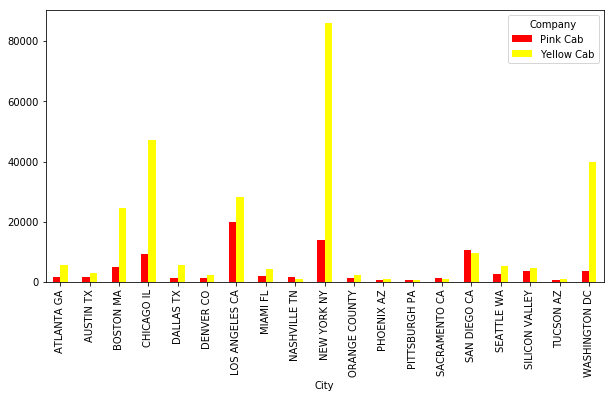

In [95]:
citypop.reset_index(inplace= True)
df2 = citypop.pivot(index='City', columns='Company', values='Transaction ID')
df2.plot.bar(color= ['red', 'yellow'], figsize = [10, 5] )

#### From the above plot it can be observed that Yellow cab had more rides in most of the cities, except Nashville, Pittsburgh, Sacramento and San Diego.

# Final Conclusion

1. Yearly and Monthly profits of Yellow Cab is higher than Pink Cab.
2. Customers made more ride through Yellow Cab in most of the city. And in the rest the difference in rides was not that much.
3. Both the companies have increased in Profit and users from 2016-2017, however a slight decrease is observed from 2017-2018.
4. In all aspects Yellow Cab company is found to be dominant.

Thus I will recommend investing in Yellow Cab Company.
